# Relação entre desempenho escolar e fatores socioeconômicos: uma análise descritiva.

Atividade da disciplina de Introdução à Ciência de Dados, da Especialização em Ciência de Dados e Analitycs do Programa de Pós-Graduação em Engenharia da Computação da Universidade Estadual de Pernambuco (UPE).



## 1. Importação das bibliotecas necessárias

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
import numpy as np

# 2. Importação da base Student Performance
Disponível em UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/320/student+performance

Utilizamos apenas as notas da disciplina de Matemática. Arquivo: student-mat.csv

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Student/student-mat.csv", sep=';')

# 3. Criação da coluna média geral

A partir das notas G1, G2 e G3, verificamos a média geral. Esta é uma base de dados com informações de duas escolas portuguesas. Foi necessário a divisão da média geral por 2 para adequação ao padrão de notas brasileiro (0 a 10).

In [4]:
df['mediaGeral'] = (((df['G1'] + df['G2'] + df['G3']) / 3) / 2).round(2)

Cabeçalho da base com as 10 primeiras ocorrências.

In [5]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mediaGeral
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,2.83
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,2.67
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,4.17
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,7.33
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,4.33
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,7.50
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,5.83
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,2.83
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,8.83
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,7.33


Tamanho da base

In [6]:
df.shape

(395, 34)

Verificação de valores ausentes

<Axes: >

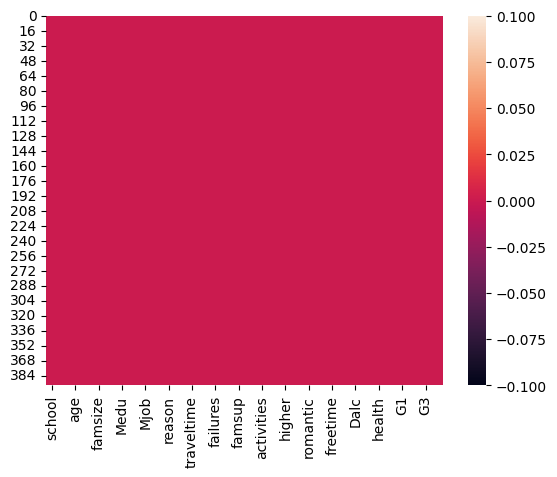

In [7]:
sns.heatmap(df.isna())

Estatística descritiva da base.

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mediaGeral
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,5.339848
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,1.848270
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.670000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,4.170000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,5.330000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,6.670000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,9.670000


# 4. Divisão da base em quintis da média geral

Divisão a partir da seguinte classificação de notas da coluna média geral:
1. Notas péssimas
2. Notas ruins
3. Notas medianas
4. Notas boas
5. Notas ótimas

In [9]:
quintis = [df['mediaGeral'].quantile(q) for q in [0, 0.2, 0.4, 0.6, 0.8, 1]]

In [10]:
notas_pessimas = df[df['mediaGeral'] <= quintis[1]]
notas_ruins = df[(df['mediaGeral'] > quintis[1]) & (df['mediaGeral'] <= quintis[2])]
notas_medianas = df[(df['mediaGeral'] > quintis[2]) & (df['mediaGeral'] <= quintis[3])]
notas_boas = df[(df['mediaGeral'] > quintis[3]) & (df['mediaGeral'] <= quintis[4])]
notas_otimas = df[df['mediaGeral'] > quintis[4]]

In [11]:
print(len(notas_pessimas),len(notas_ruins),len(notas_medianas),len(notas_boas),len(notas_otimas))

82 82 79 78 74


# 5. Percentual de não acesso à internet

Percentual de não acesso à internet por classificação de notas

In [12]:
#INTERNET
g1InternetSim = len(notas_pessimas[notas_pessimas['internet'] == "yes"]['mediaGeral'])
g1InternetNao = len(notas_pessimas[notas_pessimas['internet'] == "no"]['mediaGeral'])
g1SemNet = round((g1InternetNao / g1InternetSim)*100, 2)
print(f"Percentual do não acesso à internet no grupo de Notas Piores: {g1SemNet}")

g2InternetSim = len(notas_ruins[notas_ruins['internet'] == "yes"]['mediaGeral'])
g2InternetNao = len(notas_ruins[notas_ruins['internet'] == "no"]['mediaGeral'])
g2SemNet = round((g2InternetNao / g2InternetSim)*100,2)
print(f"Percentual do não acesso à internet no grupo de Notas Ruins: {g2SemNet}")

g3InternetSim = len(notas_medianas[notas_medianas['internet'] == "yes"]['mediaGeral'])
g3InternetNao = len(notas_medianas[notas_medianas['internet'] == "no"]['mediaGeral'])
g3SemNet = round((g3InternetNao / g3InternetSim)*100,2)
print(f"Percentual do não acesso à internet no grupo de Notas Medianas: {g3SemNet}")

g4InternetSim = len(notas_boas[notas_boas['internet'] == "yes"]['mediaGeral'])
g4InternetNao = len(notas_boas[notas_boas['internet'] == "no"]['mediaGeral'])
g4SemNet = round((g4InternetNao / g4InternetSim)*100,2)
print(f"Percentual do não acesso à internet no grupo de Notas Boas: {g4SemNet}")

g5InternetSim = len(notas_otimas[notas_otimas['internet'] == "yes"]['mediaGeral'])
g5InternetNao = len(notas_otimas[notas_otimas['internet'] == "no"]['mediaGeral'])
g5SemNet = round((g5InternetNao / g5InternetSim)*100,2)
print(f"Percentual do não acesso à internet no grupo de Notas Ótimas: {g5SemNet}")

Percentual do não acesso à internet no grupo de Notas Piores: 28.12
Percentual do não acesso à internet no grupo de Notas Ruins: 28.12
Percentual do não acesso à internet no grupo de Notas Medianas: 16.18
Percentual do não acesso à internet no grupo de Notas Boas: 18.18
Percentual do não acesso à internet no grupo de Notas Ótimas: 10.45


Gráfico dos percentuais do não acesso à internet por grupos de notas

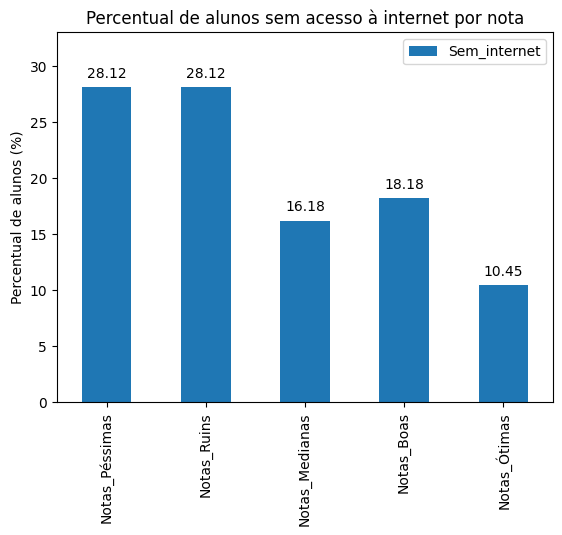

In [13]:
plotdata = pd.DataFrame({
    "Sem_internet": [g1SemNet, g2SemNet, g3SemNet, g4SemNet, g5SemNet],
}, index=["Notas_Péssimas", "Notas_Ruins", "Notas_Medianas", "Notas_Boas", "Notas_Ótimas"])

ax = plotdata.plot(kind="bar", stacked=True)

# Adicionando os valores acima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Definindo o limite do eixo Y para 37
ax.set_ylim(top=33)

plt.title('Percentual de alunos sem acesso à internet por nota')
plt.ylabel("Percentual de alunos (%)")
plt.show()

Boxplot com mediana das notas da média geral dividido entre os grupos que possuem e não possuem acesso à internet

<Axes: xlabel='internet', ylabel='mediaGeral'>

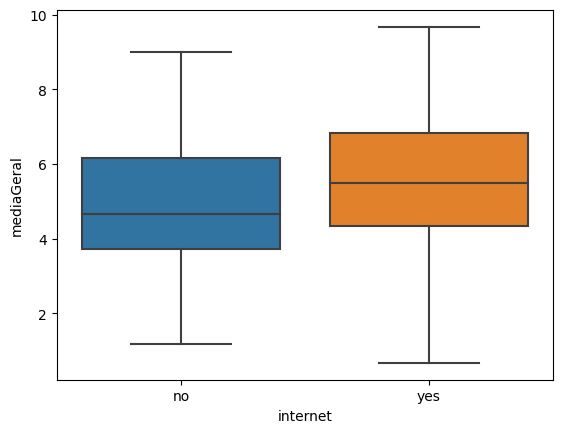

In [14]:
sns.boxplot(x='internet', y='mediaGeral', data=df)

In [15]:
# Filtrando as linhas onde 'internet' é "yes" e "no"
dfInternetYes = df[df['internet'] == 'yes']
dfInternetNo = df[df['internet'] == 'no']

# Calculando a mediana das notas (coluna 'mediaGeral') para as linhas onde 'internet' é "yes" e "no"
mediana_internetYes = dfInternetYes['mediaGeral'].median()
mediana_internetNo = dfInternetNo['mediaGeral'].median()

# Imprimindo o resultado
print(f"Mediana das notas dos que possuem internet: {mediana_internetYes}")
print(f"Mediana das notas dos que não possuem internet: {mediana_internetNo}")

Mediana das notas dos que possuem internet: 5.5
Mediana das notas dos que não possuem internet: 4.67


# 6. Gráfico de Violino da relação entre consumo de álcool e média geral

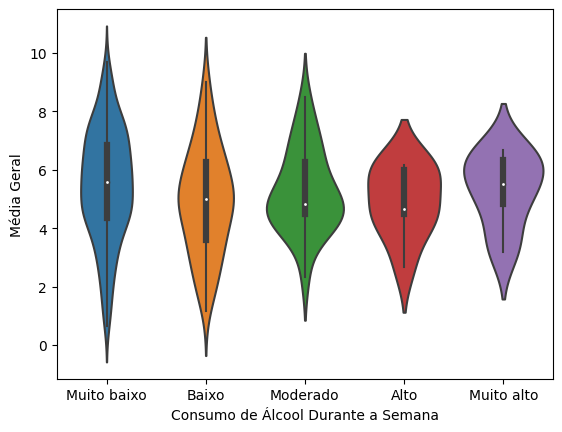

In [16]:
# Mapeamento entre números e significados
mapeamento_dalc = {1: 'Muito baixo', 2: 'Baixo', 3: 'Moderado', 4: 'Alto', 5: 'Muito alto'}

# Aplicando o mapeamento à coluna Dalc
df['Dalc_label'] = df['Dalc'].map(mapeamento_dalc)

# Definindo a ordem dos rótulos
ordem_dalc = ['Muito baixo', 'Baixo', 'Moderado', 'Alto', 'Muito alto']

# Criando o gráfico com os rótulos personalizados
sns.violinplot(x='Dalc_label', y='mediaGeral', data=df, order=ordem_dalc)

# Adicionando rótulos aos eixos
plt.xlabel('Consumo de Álcool Durante a Semana')
plt.ylabel('Média Geral')

# Mostrando o gráfico
plt.show()

# 7. Gráfico de dispersão entre o consumo de álcool e a média geral

<Axes: xlabel='Consumo de Álcool Durante a Semana', ylabel='Média Geral'>

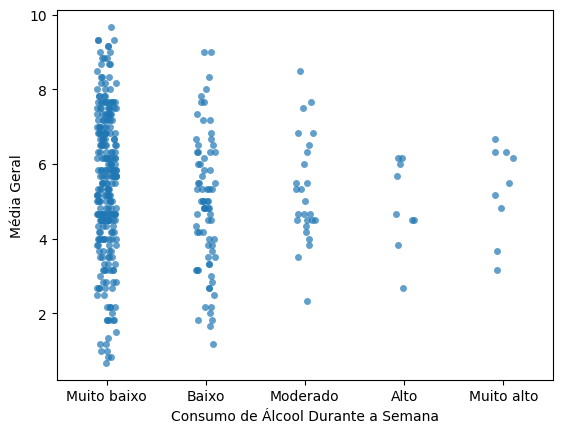

In [18]:
# Adicionando rótulos aos eixos
plt.xlabel('Consumo de Álcool Durante a Semana')
plt.ylabel('Média Geral')

# Criando o gráfico
sns.stripplot(x='Dalc_label', y='mediaGeral', data=df, order=ordem_dalc, jitter=True, alpha=0.7)

# 8. Considerações parciais e sugestões de novas análises

A criação dos valores de "média geral" foi essencial para realizar as análises das relações entre desempenho escolar, acesso à internet e consumo de bebida alcoólica.

No que tange ao acesso à internet, foi possível verificar pequena variação negativa do percentual dos que não possuem acesso à internet, na medida que avançamos para os grupos de alunos com maiores notas. Essa variação negativa ficou evidente no gráfico de barras com o percentual de alunos sem acesso à internet por nota. O gráfico boxplot também foi útil para constatação dessa variação negativa. Enquanto a mediana das notas dos que não possuem internet ficou em 4.67, entre os que possuem acesso à internet a mediana das notas ficou em 5.50.

Em relação ao consumo de bebida alcoolica, verificamos uma relação inversamente proporcional. Tanto no gráfico de violino como no gráfico de dispersão de pontos percebemos que na medida que o consumo de bebida alcoolica aumenta, há diminuição das médias. Com exceção do grupo 5 (consumo de bebida muito alto), há uma constante diminuição das medianas das notas na medida em que avançamos para grupos onde o consumo da bebida alcoólica aumenta.

Esta foi uma breve análise descritiva bastante preliminar da base Student Performance que buscou compreender a relação entre desempenho escolar e alguns fatores socioeconomicos. Como próxima etapa deste estudo sugere-se o desenvolvimento da análise a partir da identificação dos índices de covariância e de correlação entre as variáveis aqui exploradas e outras da mesma base. Sugere-se também a construção de modelos de regressão que possa constatar e predizer o desempenho escolar de um aluno a partir de um dado conjunto de variáveis.


